# **Proyecto I**

## **Modelos predictivos**

Daniel Bernal

**Intencion:**

El siguiente proyecto tiene la intención de evaluar el rendimiento y las relaciones entre las distintas variables que afectan al consumo de combustible (medido en millas por galón, MPG) en automóviles. A través de un enfoque estructurado, se busca identificar patrones, determinar cuáles variables tienen mayor influencia en el consumo y desarrollar un modelo de predicción confiable.

**Metodologia:**

Para lograr estos objetivos, se parte de un análisis exploratorio del conjunto de datos, el cual incluye tanto variables categóricas como continuas. Este análisis permitirá comprender las interacciones entre las variables y su impacto en la variable objetivo (MPG). Posteriormente, se plantea la construcción de varios modelos de regresión, ajustados y evaluados mediante técnicas como validación cruzada y métricas de error (MSE y RMSE). Este enfoque garantiza la identificación del modelo que mejor generalice a nuevos datos.

**Enfoque:**

El proyecto no solo se centra en encontrar el mejor modelo predictivo, sino también en la aplicación rigurosa del proceso científico, fomentando la capacidad analítica y de autoaprendizaje del investigador. Esto incluye evaluar diferentes estrategias de preprocesamiento, comparar modelos en función de sus errores y reflexionar sobre el impacto de las decisiones tomadas en los resultados obtenidos.

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

df = pd.read_csv("/content/Auto.csv")

## **Paso 1**
Utilizando el dataset de Auto(variable a predecir MPG)

Realizar un análisis exploratorio

In [121]:
#- En primera instancia se evalua que no hay datos nulos por lo tanto no es necesario hacer una imputacion de algun dato esta valuacion se hace por medio
#  de la utilizacion del comando df.info().
#
#- por la visualizacion de los datos podemos llegar a la coclusion que los datos evaluados partenecen al rendimiento de distintos automoviles.
#
#- El dataframe cuenta con 9 columnas o variables cada una con 396 entradas. Solo se cuenta con una variable categorica categorica la cual es "name", el resto son
#  numericas, sin embargo dentro de las numericas hay algunas categoricas como lo son "cylinders", "year" y "origin". En resto son numericas continuas.
#
#- A continuacion se vera cual es la relacion que tiene cada variable con "mpg" usando la siguiente estrategia, Numerica contra numerica: hacer scatter y buscar
#  el coef de corr, Categorica vs numerica: hacer histograma y se comparan mean y std o hacer el boxplot comparar median y los rangogos intercuartilicos,
#  Categorica vs categorica: hacer una tabla de contingencia y comaprar probabilidad.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


## **Comparacion numerica vs. numerica**

'mpg' vs ('horsepower', 'displacement', 'weight', 'acceleration')

In [127]:
pnt1_1 = df[['mpg','displacement','weight','acceleration','horsepower']]

for col in pnt1_1.columns:
    pnt1_1[col] = pd.to_numeric(pnt1_1[col].replace('?', pd.NA))

pnt1_1.corr()

<ipython-input-127-470bd9708db9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pnt1_1[col] = pd.to_numeric(pnt1_1[col].replace('?', pd.NA))


,mpg,displacement,weight,acceleration,horsepower
mpg,1.000000,-0.804203,-0.831741,0.420289,-0.778427
displacement,-0.804203,1.000000,0.932824,-0.543684,0.897257
weight,-0.831741,0.932824,1.000000,-0.417457,0.864538
acceleration,0.420289,-0.543684,-0.417457,1.000000,-0.689196
horsepower,-0.778427,0.897257,0.864538,-0.689196,1.000000


<Axes: xlabel='mpg', ylabel='acceleration'>

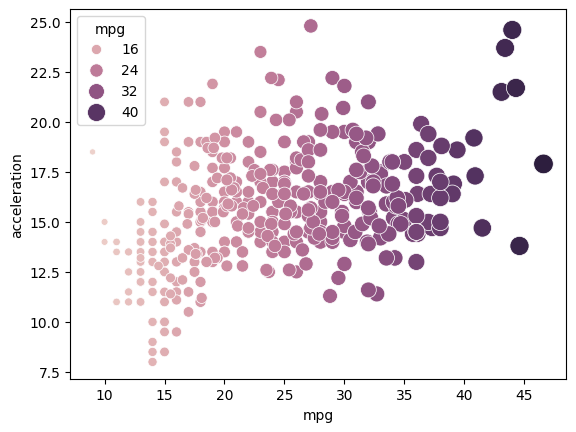

In [32]:
sns.scatterplot(data=df,x=df['mpg'],y=df['acceleration'], hue='mpg',size="mpg",
    sizes=(20, 200)
)

<Axes: xlabel='mpg', ylabel='weight'>

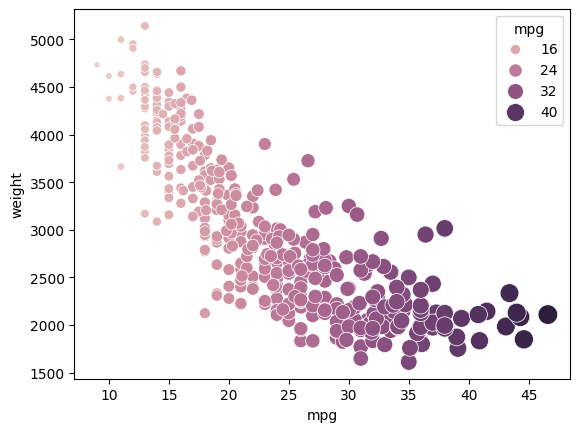

In [33]:
sns.scatterplot(data=df,x=df['mpg'],y=df['weight'], hue='mpg',size="mpg",
    sizes=(20, 200)
)

<Axes: xlabel='mpg', ylabel='displacement'>

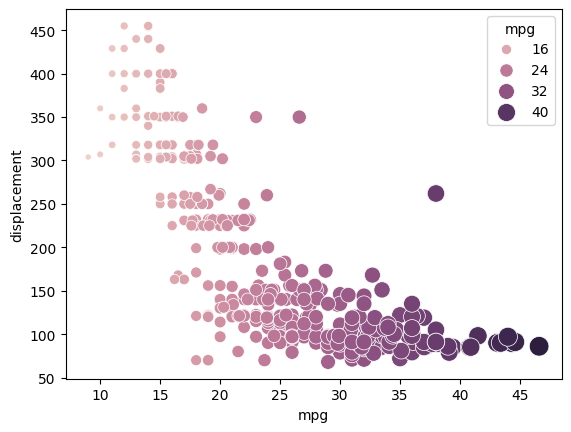

In [34]:
sns.scatterplot(data=df,x=df['mpg'],y=df['displacement'], hue='mpg',size="mpg",
    sizes=(20, 200)
)

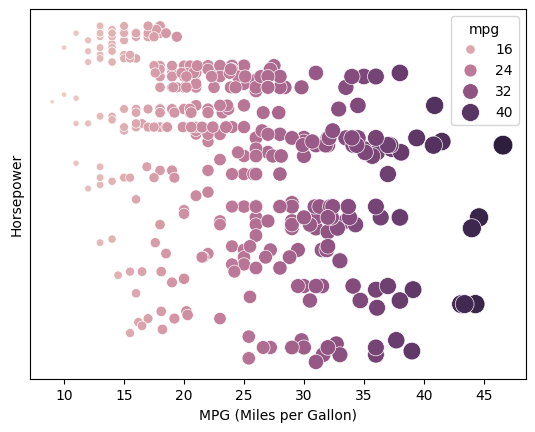

In [120]:
sns.scatterplot(data=df,x='mpg',y='horsepower',hue='mpg',size='mpg',sizes=(10, 200))
plt.yticks([])
plt.xlabel('MPG (Miles per Gallon)')
plt.ylabel('Horsepower')
plt.show()


## **Comparacion numerica vs. categorica**

'mpg' vs ('cylinders', 'year', 'origin', 'name')

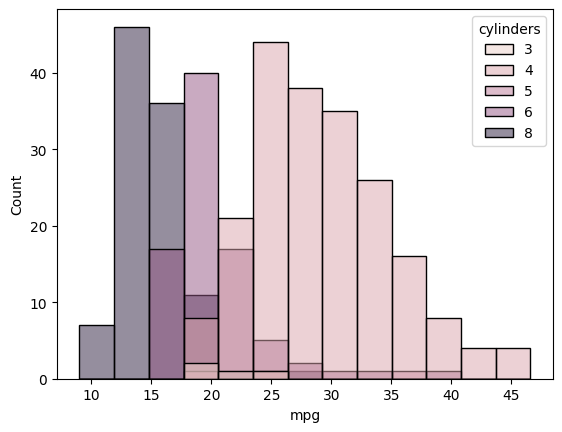

In [36]:
#-como se vera en el histograma "desmenuzado" mas adelante (se hace esta aclaracion para poder entender el
# como se lee) cylinders tiene un comportamiento relacionado a mpg, entre mas cilindros, la variable es menor

sns.histplot(data=df, x='mpg', hue='cylinders')
plt.show()


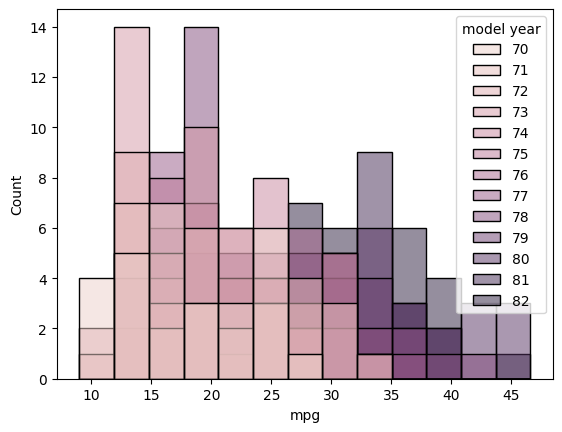

In [37]:
#Como se puede apreciar, confome avanzan los años la variable mpg aumenta un poco

sns.histplot(data=df, x='mpg', hue='model year')
plt.show()

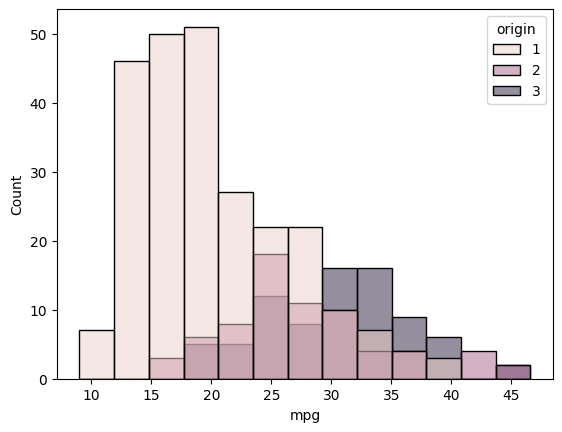

In [38]:
#Como se puede apreciar, confome cambia el lugar de origen la variable mpg aumenta significativamente

sns.histplot(data=df, x='mpg', hue='origin')
plt.show()

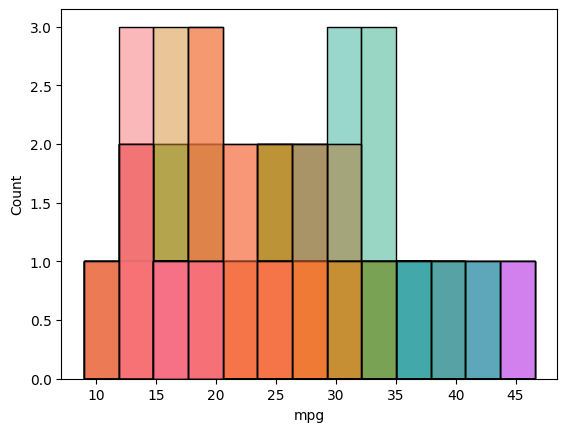

array(['chevrolet chevelle malibu', 'buick skylark 320',
       'plymouth satellite', 'amc rebel sst', 'ford torino',
       'ford galaxie 500', 'chevrolet impala', 'plymouth fury iii',
       'pontiac catalina', 'amc ambassador dpl', 'dodge challenger se',
       "plymouth 'cuda 340", 'chevrolet monte carlo',
       'buick estate wagon (sw)', 'toyota corona mark ii',
       'plymouth duster', 'amc hornet', 'ford maverick', 'datsun pl510',
       'volkswagen 1131 deluxe sedan', 'peugeot 504', 'audi 100 ls',
       'saab 99e', 'bmw 2002', 'amc gremlin', 'ford f250', 'chevy c20',
       'dodge d200', 'hi 1200d', 'chevrolet vega 2300', 'toyota corona',
       'ford pinto', 'plymouth satellite custom', 'ford torino 500',
       'amc matador', 'pontiac catalina brougham', 'dodge monaco (sw)',
       'ford country squire (sw)', 'pontiac safari (sw)',
       'amc hornet sportabout (sw)', 'chevrolet vega (sw)',
       'pontiac firebird', 'ford mustang', 'mercury capri 2000',
       'opel 1900'

In [126]:
#- En cuanto a los nombres al ser demasiados, es mas complicado indentificar un comportamineto especifico a mpg, se puede decir
#  que hay un comportamineto pero al ser tantas marcas no tiene relevancia ver como difieren cada una de los gastos, por lo tanto
#  no se tomara en cuenta

sns.histplot(data=df, x='mpg', hue='car name')
leg = plt.legend() # call plt.legend() to generate the legend first
leg.remove()
plt.show()

df['car name'].unique()

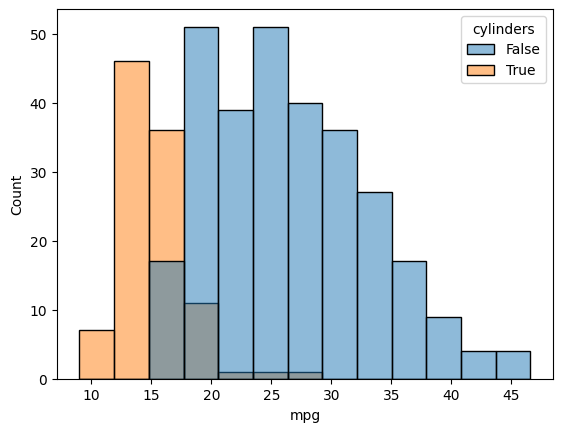

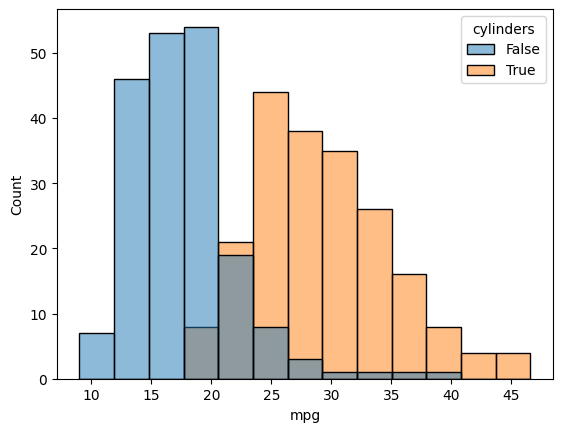

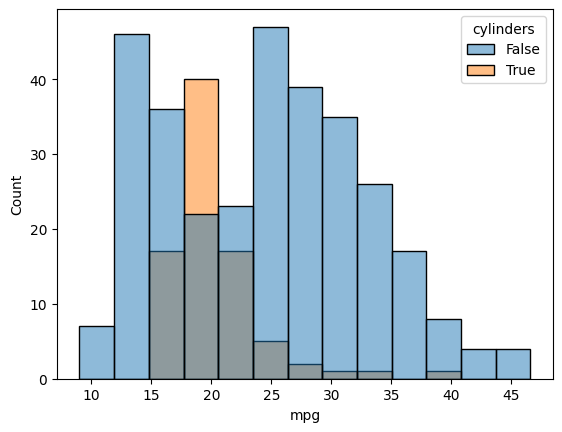

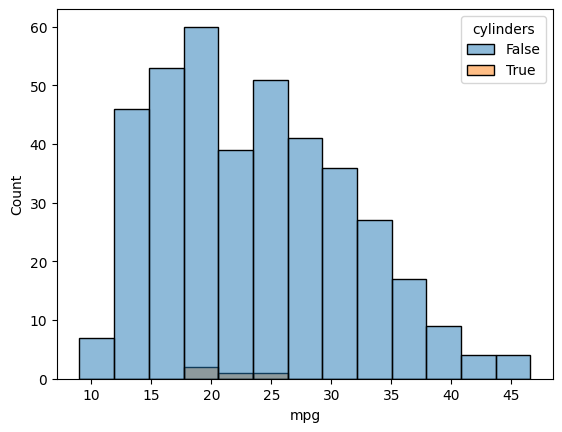

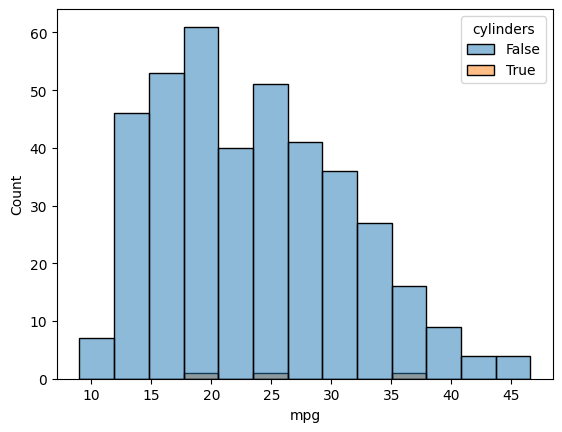

In [41]:
#Separacion del histograma completo de cylinders
for hues in df['cylinders'].unique():
  h = df['cylinders'] == hues
  sns.histplot(data=df, x='mpg', hue=h)
  plt.show()

## **Paso 2**
¿Cuáles variables posiblemente se relacionan con la variable a predecir?

In [43]:
#- Como se analizo anteriormente con los distintos metodos de comparacion de las variables se puede llegar a la siguiente conclusion
# de las variables numerica vs numerica, la unica que tiene correlacion positiva (aunque debil) es acceleracion, de resto son
# correlaciones negativas exepctuando a horsepower la cual no prensenta ningun comportamineto y es la que tiene menos relacion con la
# variable a predecir. De las categorica vs numerica, las que que se ve una influencia es year, origin y cylinders, name se ve descarta
# por la razon mencionada anteriormente.

df_pnt2 = df[['mpg','acceleration','model year','origin','cylinders']]

## **Paso 3**
Dividir el conjunto en train y test


In [45]:
from sklearn.preprocessing import LabelEncoder

train, test = train_test_split(df_pnt2, test_size=0.3, random_state=123)

x_train = train[['acceleration','model year','origin','cylinders']]
y_train = train['mpg']

x_test = test[['acceleration','model year','origin','cylinders']]
y_test = test['mpg']

#Se realiza un paso adicional pues y debe teenr un valor categorico y no continuo

le = LabelEncoder()
le.fit(y_train.unique())
y_train = le.transform(y_train)

In [46]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=3)
model.fit(x_train, y_train)

x_train
model.predict([[19.4,82,1,4]])
model.predict_proba([[19.4,82,1,4]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.04545455, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.04545455, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.13636364,
        0.        , 0.        , 0.        , 0.09090909, 0.        ,
        0.        , 0.04545455, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.09090909,
        0.        , 0.        , 0.        , 0.  

## **Paso 4**
Crear un pipeline de procesamiento, incluyendo un modelo de predicción para regresión(Probar con LinearRegression, DecisionTreeRegressor, RandomForestRegressor, KNNRegressor y diferentes métodos de procesamiento)

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

df_num_pnt4 = df[['mpg','acceleration']]
df_cat_pnt4 = df[['model year','origin','cylinders']]

pipeline_numerico =\
   Pipeline(
      [
        ('Escalador_num', MinMaxScaler())
      ]
   )

pipeline_categorico =\
   Pipeline(
      [
        ('Escalador_onehot', OneHotEncoder())
      ]
   )

models = {
  'Linear Regression': LinearRegression(),
  'Decision Tree Regressor': DecisionTreeRegressor(),
  'Random Forest Regressor': RandomForestRegressor(),
  'KNN Regressor': KNeighborsRegressor()
}

In [50]:
df_pnt2

,mpg,acceleration,model year,origin,cylinders
0,18.0,12.0,70,1,8
1,15.0,11.5,70,1,8
2,18.0,11.0,70,1,8
3,16.0,12.0,70,1,8
4,17.0,10.5,70,1,8
...,...,...,...,...,...
393,27.0,15.6,82,1,4
394,44.0,24.6,82,2,4
395,32.0,11.6,82,1,4
396,28.0,18.6,82,1,4


## **Paso 5**
Utilizar CV de 5 para ajustar hiperparámetros y determinar el mejor modelo(incluyendo el pipeline de procesamiento).

In [51]:
from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer(
  [
      ('Numerico',pipeline_numerico, [1,3]),
      ('Categorico',pipeline_categorico, [0,2,4])
  ]
)

transformer.fit(df_pnt2)
df_pnt5 = transformer.transform(df_pnt2)

df_pnt5

<398x149 sparse matrix of type '<class 'numpy.float64'>'
	with 1740 stored elements in Compressed Sparse Row format>

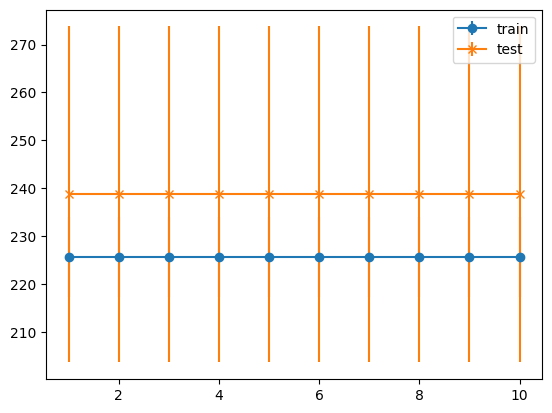

In [52]:
from sklearn.model_selection import cross_validate

lr_train_mean_list = []
lr_train_std_list = []
lr_test_mean_list = []
lr_test_std_list = []

for _ in range(10):
    model = LinearRegression()
    model.fit(x_train, y_train)
    results = cross_validate(
        LinearRegression(),
        x_train, y_train, cv=5,
        scoring=["neg_mean_squared_error"],
        return_train_score=True
    )
    lr_train_mean_list.append(-results['train_neg_mean_squared_error'].mean())
    lr_train_std_list.append(results['train_neg_mean_squared_error'].std())
    lr_test_mean_list.append(-results['test_neg_mean_squared_error'].mean())
    lr_test_std_list.append(results['test_neg_mean_squared_error'].std())

plt.errorbar(range(1, 11), lr_train_mean_list, lr_train_std_list, label="train", marker="o")
plt.errorbar(range(1, 11), lr_test_mean_list, lr_test_std_list, label="test", marker="x")
plt.legend()
plt.show()


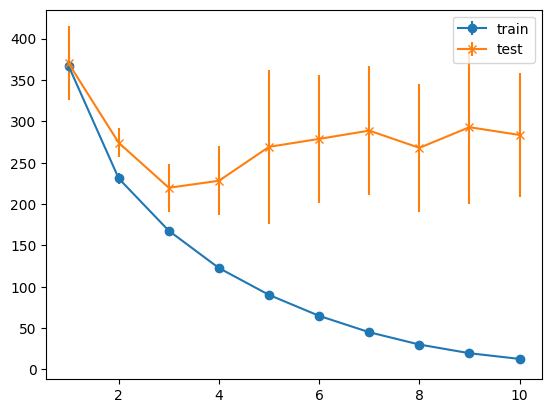

In [53]:
dtr_train_mean_list = list()
dtr_train_std_list = list()
dtr_test_mean_list = list()
dtr_test_std_list = list()

for i in range(10):
  model = DecisionTreeRegressor(max_depth=i+1)
  model.fit(x_train, y_train)
  results = cross_validate(
    DecisionTreeRegressor(max_depth=i+1),
    x_train, y_train, cv=5,
    scoring=["neg_mean_squared_error"],
    return_train_score=True
  )
  dtr_train_mean_list.append(-results['train_neg_mean_squared_error'].mean())
  dtr_train_std_list.append(results['train_neg_mean_squared_error'].std())
  dtr_test_mean_list.append(-results['test_neg_mean_squared_error'].mean())
  dtr_test_std_list.append(results['test_neg_mean_squared_error'].std())

plt.errorbar(range(1,11),dtr_train_mean_list,dtr_train_std_list, label = "train", marker="o")
plt.errorbar(range(1,11),dtr_test_mean_list,dtr_test_std_list, label = "test", marker="x")
plt.legend()
plt.show()

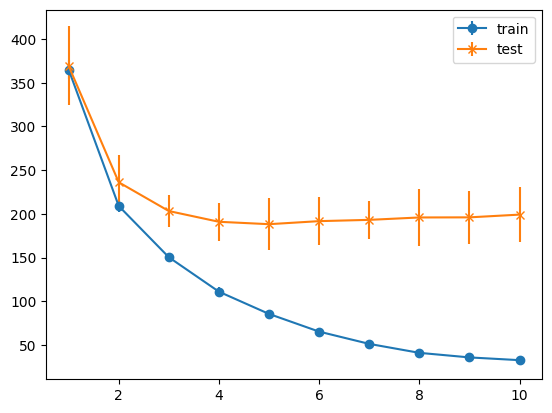

In [54]:
rf_train_mean_list = list()
rf_train_std_list = list()
rf_test_mean_list = list()
rf_test_std_list = list()

for i in range(10):
  model = RandomForestRegressor(max_depth=i+1)
  model.fit(x_train, y_train)
  results = cross_validate(
    RandomForestRegressor(max_depth=i+1),
    x_train, y_train, cv=5,
    scoring=["neg_mean_squared_error"],
    return_train_score=True
  )
  rf_train_mean_list.append(-results['train_neg_mean_squared_error'].mean())
  rf_train_std_list.append(results['train_neg_mean_squared_error'].std())
  rf_test_mean_list.append(-results['test_neg_mean_squared_error'].mean())
  rf_test_std_list.append(results['test_neg_mean_squared_error'].std())

plt.errorbar(range(1,11),rf_train_mean_list,rf_train_std_list, label = "train", marker="o")
plt.errorbar(range(1,11),rf_test_mean_list,rf_test_std_list, label = "test", marker="x")
plt.legend()
plt.show()

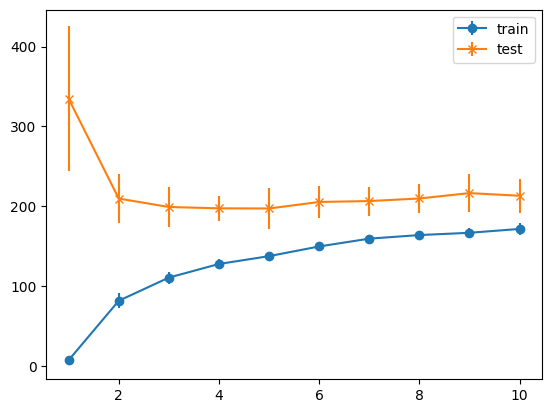

In [55]:
knr_train_mean_list = list()
knr_train_std_list = list()
knr_test_mean_list = list()
knr_test_std_list = list()

for i in range(10):
  model = KNeighborsRegressor(n_neighbors=i+1)
  model.fit(x_train, y_train)
  results = cross_validate(
    KNeighborsRegressor(n_neighbors=i+1),
    x_train, y_train, cv=5,
    scoring=["neg_mean_squared_error"],
    return_train_score=True
  )
  knr_train_mean_list.append(-results['train_neg_mean_squared_error'].mean())
  knr_train_std_list.append(results['train_neg_mean_squared_error'].std())
  knr_test_mean_list.append(-results['test_neg_mean_squared_error'].mean())
  knr_test_std_list.append(results['test_neg_mean_squared_error'].std())

plt.errorbar(range(1,11),knr_train_mean_list,knr_train_std_list, label = "train", marker="o")
plt.errorbar(range(1,11),knr_test_mean_list,knr_test_std_list, label = "test", marker="x")
plt.legend()
plt.show()

## **Paso 6**
Métricas a utilizar: mse y rmse

La métrica utilizada en el cross_validate es "mse", por esto mismo en este esapcio sólo se tendrá en cuenta la métrica "rmse" y comparando ambas se tomará el mejor método para pobrar el test en él

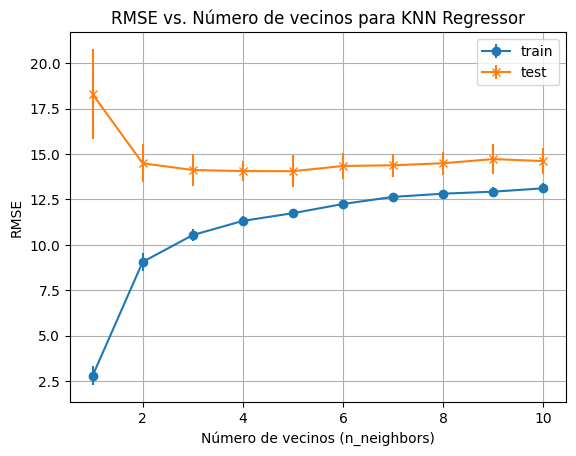

In [56]:
knr_train_mean_list = []
knr_train_std_list = []
knr_test_mean_list = []
knr_test_std_list = []

for i in range(1, 11):
    model = KNeighborsRegressor(n_neighbors=i)
    results = cross_validate(
        model,
        x_train, y_train, cv=5,
        scoring=["neg_mean_squared_error"],
        return_train_score=True
    )

    knr_train_mean_list.append(-results['train_neg_mean_squared_error'].mean())
    knr_train_std_list.append(results['train_neg_mean_squared_error'].std())
    knr_test_mean_list.append(-results['test_neg_mean_squared_error'].mean())
    knr_test_std_list.append(results['test_neg_mean_squared_error'].std())

knr_train_rmse_list = np.sqrt(knr_train_mean_list)
knr_train_rmse_std = np.array(knr_train_std_list) / (2 * knr_train_rmse_list)
knr_test_rmse_list = np.sqrt(knr_test_mean_list)
knr_test_rmse_std = np.array(knr_test_std_list) / (2 * knr_test_rmse_list)

plt.errorbar(range(1, 11), knr_train_rmse_list, knr_train_rmse_std, label="train", marker="o")
plt.errorbar(range(1, 11), knr_test_rmse_list, knr_test_rmse_std, label="test", marker="x")
plt.xlabel('Número de vecinos (n_neighbors)')
plt.ylabel('RMSE')
plt.title('RMSE vs. Número de vecinos para KNN Regressor')
plt.legend()
plt.grid(True)
plt.show()

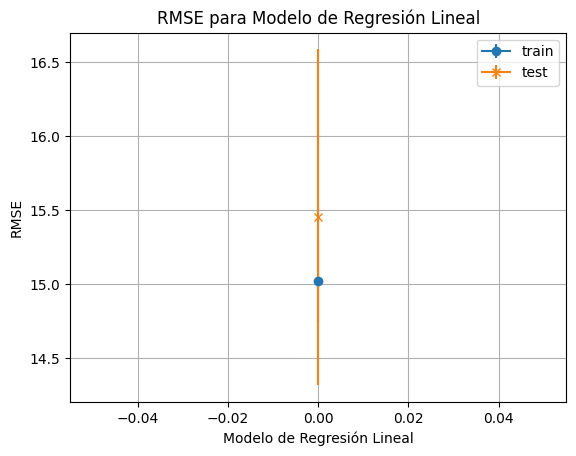

In [57]:
lr_train_mean_list = []
lr_train_std_list = []
lr_test_mean_list = []
lr_test_std_list = []

model = LinearRegression()
model.fit(x_train, y_train)

results = cross_validate(
    model,
    x_train, y_train, cv=5,
    scoring=["neg_mean_squared_error"],
    return_train_score=True
)

lr_train_mean_list.append(-results['train_neg_mean_squared_error'].mean())
lr_train_std_list.append(results['train_neg_mean_squared_error'].std())
lr_test_mean_list.append(-results['test_neg_mean_squared_error'].mean())
lr_test_std_list.append(results['test_neg_mean_squared_error'].std())

lr_train_rmse_list = np.sqrt(lr_train_mean_list)
lr_train_rmse_std = np.array(lr_train_std_list) / (2 * lr_train_rmse_list)
lr_test_rmse_list = np.sqrt(lr_test_mean_list)
lr_test_rmse_std = np.array(lr_test_std_list) / (2 * lr_test_rmse_list)

plt.errorbar(range(1), lr_train_rmse_list, lr_train_rmse_std, label="train", marker="o")
plt.errorbar(range(1), lr_test_rmse_list, lr_test_rmse_std, label="test", marker="x")
plt.xlabel('Modelo de Regresión Lineal')
plt.ylabel('RMSE')
plt.title('RMSE para Modelo de Regresión Lineal')
plt.legend()
plt.grid(True)
plt.show()

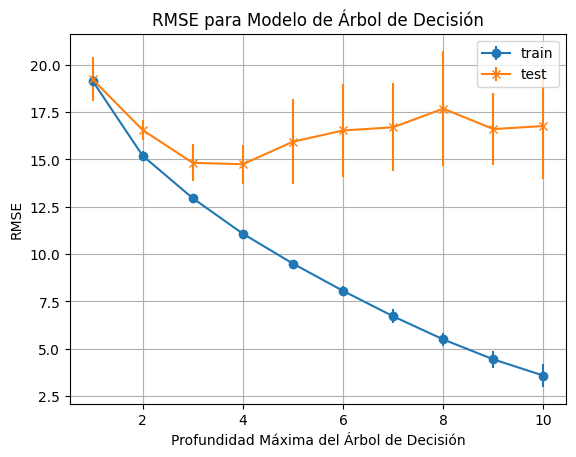

In [58]:
dtr_train_mean_list = []
dtr_train_std_list = []
dtr_test_mean_list = []
dtr_test_std_list = []

max_depths = range(1, 11)

for depth in max_depths:
    model = DecisionTreeRegressor(max_depth=depth)
    model.fit(x_train, y_train)
    results = cross_validate(
        model,
        x_train, y_train, cv=5,
        scoring=["neg_mean_squared_error"],
        return_train_score=True
    )

    dtr_train_mean_list.append(-results['train_neg_mean_squared_error'].mean())
    dtr_train_std_list.append(results['train_neg_mean_squared_error'].std())
    dtr_test_mean_list.append(-results['test_neg_mean_squared_error'].mean())
    dtr_test_std_list.append(results['test_neg_mean_squared_error'].std())

dtr_train_rmse_list = np.sqrt(dtr_train_mean_list)
dtr_train_rmse_std = np.array(dtr_train_std_list) / (2 * dtr_train_rmse_list)
dtr_test_rmse_list = np.sqrt(dtr_test_mean_list)
dtr_test_rmse_std = np.array(dtr_test_std_list) / (2 * dtr_test_rmse_list)

plt.errorbar(max_depths, dtr_train_rmse_list, dtr_train_rmse_std, label="train", marker="o")
plt.errorbar(max_depths, dtr_test_rmse_list, dtr_test_rmse_std, label="test", marker="x")
plt.xlabel('Profundidad Máxima del Árbol de Decisión')
plt.ylabel('RMSE')
plt.title('RMSE para Modelo de Árbol de Decisión')
plt.legend()
plt.grid(True)
plt.show()

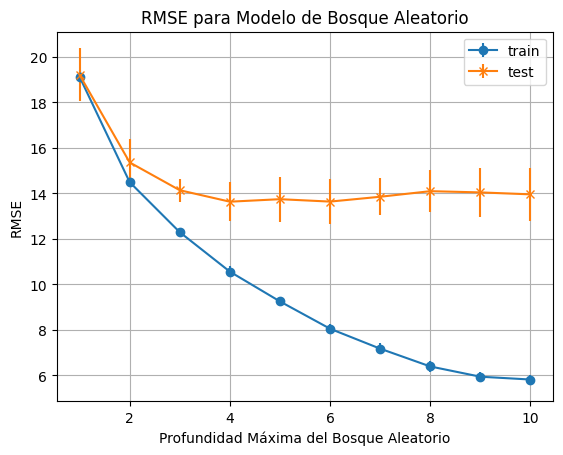

In [59]:
rf_train_mean_list = []
rf_train_std_list = []
rf_test_mean_list = []
rf_test_std_list = []

max_depths = range(1, 11)

for depth in max_depths:
    model = RandomForestRegressor(max_depth=depth)
    model.fit(x_train, y_train)
    results = cross_validate(
        model,
        x_train, y_train, cv=5,
        scoring=["neg_mean_squared_error"],
        return_train_score=True
    )

    rf_train_mean_list.append(-results['train_neg_mean_squared_error'].mean())
    rf_train_std_list.append(results['train_neg_mean_squared_error'].std())
    rf_test_mean_list.append(-results['test_neg_mean_squared_error'].mean())
    rf_test_std_list.append(results['test_neg_mean_squared_error'].std())

rf_train_rmse_list = np.sqrt(rf_train_mean_list)
rf_train_rmse_std = np.array(rf_train_std_list) / (2 * rf_train_rmse_list)
rf_test_rmse_list = np.sqrt(rf_test_mean_list)
rf_test_rmse_std = np.array(rf_test_std_list) / (2 * rf_test_rmse_list)

plt.errorbar(max_depths, rf_train_rmse_list, rf_train_rmse_std, label="train", marker="o")
plt.errorbar(max_depths, rf_test_rmse_list, rf_test_rmse_std, label="test", marker="x")
plt.xlabel('Profundidad Máxima del Bosque Aleatorio')
plt.ylabel('RMSE')
plt.title('RMSE para Modelo de Bosque Aleatorio')
plt.legend()
plt.grid(True)
plt.show()

Analisis: Para poder determinar cual el el mejor modelo primero se tiene que saber que es lo que se esta viendo, en el eje x tenemos la variacion del hyperparametro mientras que en el y podemos ver las metricas del error. Mas especifico esto es lo que se puede detectar en las graficas.

DecisionTreeRegressor:
En la gráfica de DecisionTreeRegressor, observamos que a medida que aumenta la profundidad máxima del árbol (eje x), el error cuadrático medio (MSE) en los conjuntos de entrenamiento y prueba disminuye hasta cierto punto. Esto indica que el modelo se está ajustando cada vez mejor a los datos de entrenamiento a medida que aumenta su complejidad.
Sin embargo, notamos que a medida que aumenta la profundidad máxima, el MSE en el conjunto de prueba comienza a aumentar después de cierto punto, lo que sugiere que el modelo está sobreajustando los datos de entrenamiento y no generaliza bien a datos no vistos. Se tienen para este caso en específico las mismas observaciones sobre el Error Cuadrático Medio de la Raíz (RMSE).

RandomForestRegressor:
En la gráfica de RandomForestRegressor, observamos un patrón similar al de DecisionTreeRegressor, donde el MSE en ambos conjuntos disminuye inicialmente a medida que aumenta la profundidad máxima. Sin embargo, en este caso, debido a la naturaleza de Random Forest, la diferencia entre las curvas de entrenamiento y prueba es menos pronunciada y tiende a linealizarse. Esto sugiere que Random Forest puede estar generalizando mejor que en el caso anterior. En este caso se puede observar una gráfica muy similar, pero los resultados del (RMSE) son en gran medida mucho más cercanos a cero en comparación al MSE

KNeighborsRegressor:
En la gráfica de KNeighborsRegressor, vemos un comportamiento diferente. A medida que aumenta el número de vecinos, el MSE en ambos conjuntos disminuye inicialmente y luego parece estabilizarse. No hay una clara diferencia entre las curvas de entrenamiento y prueba, lo que sugiere que el modelo no está sobreajustando ni subajustando significativamente los datos de entrenamiento.

LinearRegression:
En la gráfica de LinearRegression, observamos que el MSE en ambos conjuntos un comportamiento constante, por ete motivo no se puede apreciar de mejor manera toda la informacion que adquirimos con las curvas de otros modelos, en parte es porque no hay un hyper parametr oque se pueda observar y ajustar de mejor manera.

Conclusion:
El mejor modelo es RandomForestRegressor porque ambos errores (MSE y RMSE) en el test se estabilizan en un punto donde es aceptable comparado con el train y su varianza no es grande. no se escogio KNeighborsRegressor porque a pesar de tener unas curvas muy cercanas esto podria implicar que KNeighborsRegressor esté sobreajustando los datos de entrenamiento debido a su naturaleza flexible y sensible al ruido. No se selecciona DecisionTreeRegressor porque su error aumenta junto con su varianza de una manera no deseada. Finalmente se descarta linear por el motivo que se necesitan ver comportamientos no lineales para evaluar de mejor manera el modelo

## **Paso 7**
Evaluar el mejor modelo en test

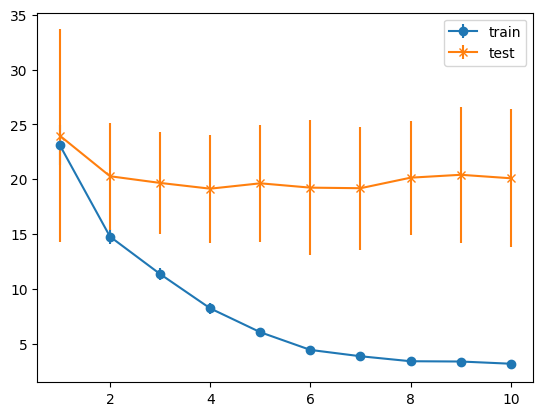

In [60]:
rf_train_mean_list = list()
rf_train_std_list = list()
rf_test_mean_list = list()
rf_test_std_list = list()

for i in range(10):
  model = RandomForestRegressor(max_depth=i+1)
  model.fit(x_test, y_test)
  results = cross_validate(
    RandomForestRegressor(max_depth=i+1),
    x_test, y_test, cv=5,
    scoring=["neg_mean_squared_error"],
    return_train_score=True
  )
  rf_train_mean_list.append(-results['train_neg_mean_squared_error'].mean())
  rf_train_std_list.append(results['train_neg_mean_squared_error'].std())
  rf_test_mean_list.append(-results['test_neg_mean_squared_error'].mean())
  rf_test_std_list.append(results['test_neg_mean_squared_error'].std())

plt.errorbar(range(1,11),rf_train_mean_list,rf_train_std_list, label = "train", marker="o")
plt.errorbar(range(1,11),rf_test_mean_list,rf_test_std_list, label = "test", marker="x")
plt.legend()
plt.show()

## **Paso 8**
Realizar un análisis final


Analisis de la creacion del experimento:

Luego de realizar este experimento se llego a varias conclusiones entre ellas esta el auto aprendizaje y la capacidad de busqueda de cada estudiante para solucionar problemas.

Con lo anterior quiero decir  que al enfrentarnos a temas que no conocemos en su totalidad sin una guia muy clara de loque se tene que realizar, sale a relucir el ingenio del estudiante y su capacidad para buscar informacion de distintas fuentes, en este caso se logro el objetivo de poder visualizar los distintos modelos, aun falta poder hacerlo de mejor manera, pero con los conocimientos actuales se puede decir que fue un exito.

Analisis del experimento:

Para poder llegar a la conclusión de que el mejor modelo es RandomForestRegressor es necesario llevar unos pasos rigurosos, entender qué variables se vuelven ineficiente para el análisis requerido y si se usan variables que no son favorables para el estudio, lo más probable es que no encontremos los datos necesarios haciendo que sea erroneo el análisis, por esto mimsmo, fue riguro escoger las variables que correspondieran y afectaran directamente la variable (mpg). Para poder determinar el mejor modelo era necesario observar el comportamiento de los errores (MSE y RMSE) para determinar cuál de los modelos produce las predicciones más precisas en el conjunto de prueba. Un valor más bajo de MSE o RMSE indica un mejor rendimiento del modelo. Al ajustar los hiperparámetros se puede minimiza el error en el conjunto de prueba, haciendo esto se puede observar que efectivamente el mejor método es RandomForestRegressor porque su error es el más pequeño entre los demás modelos.